# Building a Model on PPI SINGLE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('test_train_data.csv')
print(df.shape)

(9461, 42)


# Exploratory Data Analysis

Text(0.5, 0, 'Credit_Score')

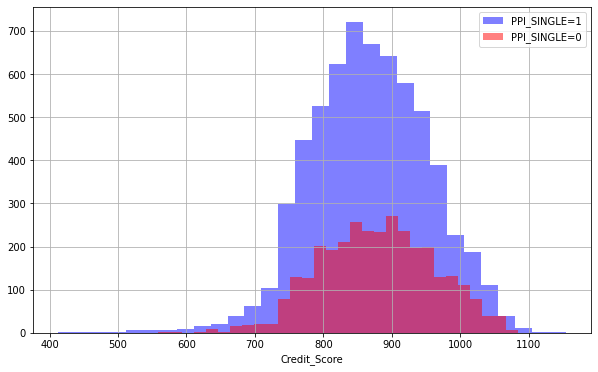

In [3]:
plt.figure(figsize=(10,6))
df[df['PPI_SINGLE']==1]['Credit_Score'].hist(alpha=0.5,color='blue',bins=30,label='PPI_SINGLE=1')
df[df['PPI_SINGLE']==0]['Credit_Score'].hist(alpha=0.5,color='red',bins=30,label='PPI_SINGLE=0')
plt.legend()
plt.xlabel('Credit_Score')

<AxesSubplot:xlabel='Income_Range', ylabel='count'>

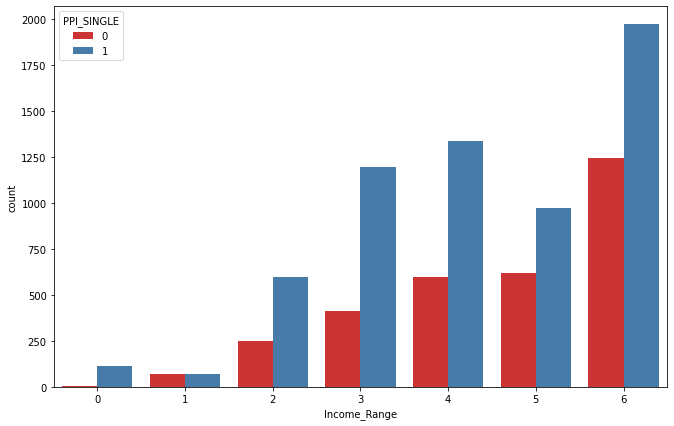

In [4]:
plt.figure(figsize=(11,7))
sns.countplot(x='Income_Range',hue='PPI_SINGLE',data=df,palette='Set1')

# Setting up the Data

In [5]:
print(df.shape)
df.set_index('Ref',inplace=True)
print(df.shape)
# drop unwanted columns
df.drop(columns=['PPI_LCI','PPI_JOINT','PPI'],inplace=True)
print(df.shape)
# df.head()

(9461, 42)
(9461, 41)
(9461, 38)


# getting the information value for each feature
## Information Value	Variable Predictiveness
    >Less than 0.02	Not useful for prediction<br>
    >0.02 to 0.1	Weak predictive Power<br>
    >0.1 to 0.3	Medium predictive Power<br>
    >0.3 to 0.5	Strong predictive Power<br>
    >0.5	Suspicious Predictive Power<br>

In [6]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [7]:
l1=[]
l2=[]
for i in df.columns:
    a=calculate_woe_iv(df,i,'PPI_SINGLE')
    l1.append(a[1])
    l2.append(i)
    
df_IV=pd.DataFrame()
df_IV['Feature']=l2
df_IV['IV']=l1
df_IV

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Feature,IV
0,Loan_Type,7.633630e-03
1,Telephone_Indicator,2.769882e-03
2,Gender,3.032531e-03
3,ACCESS_Card,7.078679e-05
4,VISA_Card,1.398510e-03
5,Cheque_Guarantee,8.644659e-05
6,Other_Credit_Store_Card,9.909678e-07
7,Residential_Status,8.190698e-02
8,Marital_Status,9.976341e-02
9,Employment_Status,2.005934e-01


In [ ]:
f_select1=list(df_IV.loc[df_IV['IV']>0.02,:]['Feature'])
f_select1.append('PPI_SINGLE')
df=df.loc[:,f_select1]
print(df.shape)
print(df.info())
df.head()

In [ ]:
target='PPI_SINGLE'
cat_vars=['Residential_Status','Marital_Status','Employment_Status','Final_Grade','Mosaic_Class']
num_vars=['Credit_Score','Term','Net_Advance','APR','Mosaic','Time_at_Address','Time_in_Employment','Income_Range','Time_with_Bank',
'Value_of_Property','Outstanding_Mortgage_Bal','Bureau_Data___Monthly_Other_Co_R','Age',
'Total_outstanding_balance__mortg','Time_since_most_recent_Public_In','Total_value__CAIS_8_9s','Total_outstanding_balance___excl',
'Total___of_accounts','Time_since_most_recent_outstandi']

In [ ]:
df.Mosaic_Class=df.Mosaic_Class.apply(lambda x: str(x))

In [ ]:
df_num=df.loc[:,num_vars]
df_cat=df.loc[:,cat_vars]

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
names = num_vars
d = scaler.fit_transform(df_num)
scaled_df = pd.DataFrame(d, columns=names)

print(scaled_df.shape)
scaled_df.head()

In [ ]:
# df_cat.Mosaic_Class=df_cat.Mosaic_Class.apply(lambda x: str(x))
print(df_cat.shape)
y = pd.get_dummies(df_cat,dtype='int')
print(y.shape)
y=y.reset_index()
y.head()

In [ ]:
df_final=pd.concat([y,scaled_df], axis=1)

In [ ]:

df_final.set_index('Ref',inplace=True)
df_final.head()

In [ ]:
from sklearn.model_selection import train_test_split
X = df_final
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=8000)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))